### GRIP - Sep 2023 @ The Sparks Foundation

## Author - Dhavala Narendra Kumar

### Task 1 - Prediction Using Supervised Machine Learning

#### In this task I have predicted the percentage of marks that a student is expected to score based upon the number of hours they studied

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

plt.rcParams["figure.figsize"] = (10,6)

### Step 1 : Loading and Understanding the Data

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


##### Step 2 - Descriptive Statistics

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.shape

(25, 2)

In [5]:
data.describe()

#The mean hours of study are 5 Hours with standard deviation of 2.5 hours.
# The minimum hours are 1 hour, whereas the maximum hours are 9.2 hours.

#The mean scores of students are 51.48% with standard deviation of 25.28%.
#The minimum scores are 17% whereas the maximum scores are 95%.

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.nunique()

Hours     23
Scores    23
dtype: int64

In [7]:
data.isnull().sum()
# There are no missing values in the dataset.

Hours     0
Scores    0
dtype: int64

### Step 3 - Distribution for both the variables

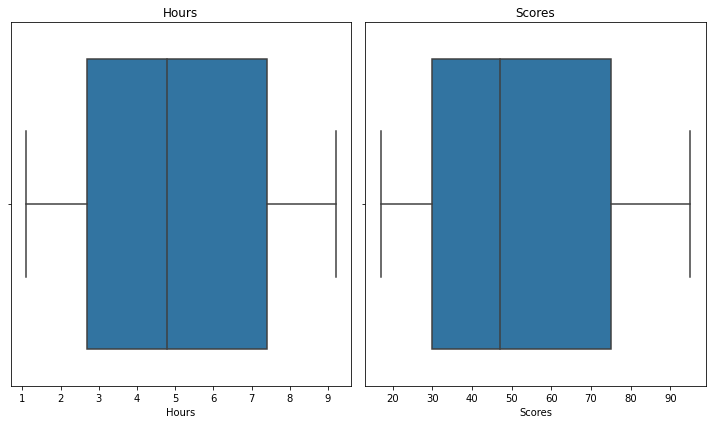

In [8]:
inct = 1
for i in data.columns:
    plt.subplot(1,2,inct)
    sns.boxplot(data[i])
    plt.title(i)
    inct+=1
plt.tight_layout()
plt.show()

# The variables are normally distributed.
# There is no presence of outliers.

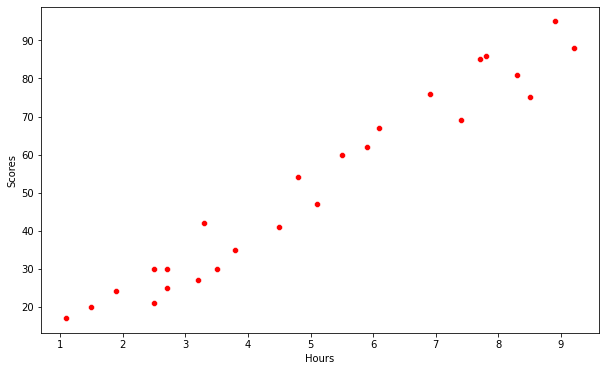

In [9]:
#Visualization of variation in Scores with varying number of study hours.

sns.scatterplot(data['Hours'],data['Scores'],color='red')
plt.show()

#The scores and hours seems to have a linear relation.

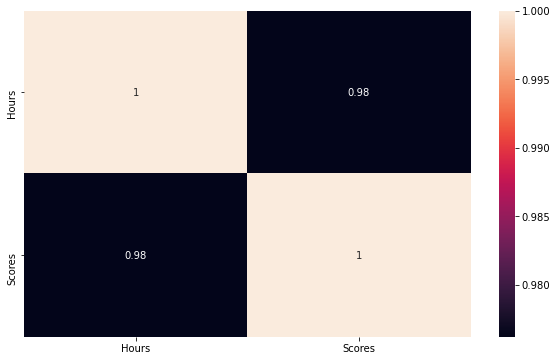

In [10]:
#Measuring the strength of relation between the two variables.

sns.heatmap(data.corr(),annot=True)
plt.show()

#The hours seems to be highly correlated to the scores,
#that is the number of study hours highly impact the scores in a positive direction 

### Step 4 - Preparing the Data

In [11]:
# Split data into features and target
y = data['Scores']
x = data.drop('Scores',axis = 1)
xc = sm.add_constant(x)

### Step 5 - Building Base Model (OLS)

In [12]:
#Assumptions to check before applying Linear regression model

#1. The target variable is numerical.

#2. There is no multicollinearity present as there is only one predictor variable.


In [13]:
#Base Model
model = sm.OLS(y, xc)
results = model.fit()

# Print the model summary
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sat, 20 May 2023   Prob (F-statistic):           9.13e-17
Time:                        12:02:10   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Insights from OLS Summary

1. R-squared value of 95.3% indicates that approximately 95% of the variation in the target variable is explained by the      model

2. The diff between R-squared(0.953) and Adj R-squared(0.951) are less(0.0020) , 
   therefore the model is significant and the predictor is good as well.
   
3. The pvalue of f-stats(9.13e-17) indicate that the model is significant.

4. The pvalue for the predictor is 0, which indicates that the predictor is Highly significant.

5. From this we can form a linear equation ( 2.4837 + 9.7758 * Hours)

### Step 6 - LR Model

In [14]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Splitting data into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42) 

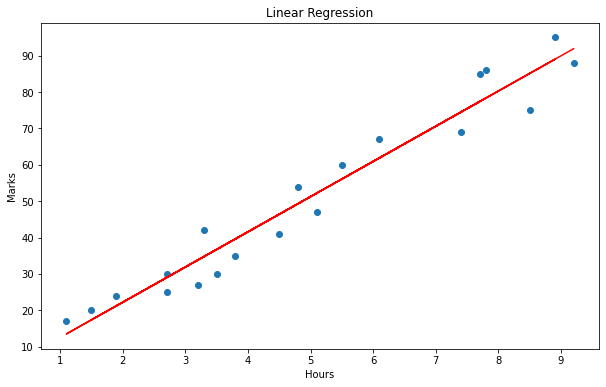

In [15]:
# Converting DataFrame to numpy arrays
x_train_arr = x_train.values
y_train_arr = y_train.values


LR = LinearRegression()

# Creating the model
model = LR.fit(x_train_arr, y_train_arr)

# Plotting the regression line
line = LR.coef_ * x_train_arr + LR.intercept_

# Plotting for the training data
plt.scatter(x_train_arr, y_train_arr)
plt.plot(x_train_arr, line.ravel(), color='red')
plt.xlabel('Hours')  
plt.ylabel('Marks')  
plt.title('Linear Regression')  
plt.show()

### Step 7 - Making Predictions

In [16]:
y_pred = model.predict(x_test)

In [17]:
# Comparing Actual vs Predicted
data["predicted_scores"]=model.predict(data[['Hours']])
data

,Hours,Scores,predicted_scores
0,2.5,21,27.032088
1,5.1,47,52.205491
2,3.2,27,33.809542
3,8.5,75,85.124557
4,3.5,30,36.714166
5,1.5,20,17.350010
6,9.2,88,91.902011
7,5.5,60,56.078322
8,8.3,81,83.188141
9,2.7,25,28.968503


In [18]:
# Testing the model with our own data
o_pred = model.predict([[9.25]])
print(f"Predicted Score = {o_pred[0]}")

Predicted Score = 92.38611528261494


### Step 8 - Evaluating the Model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different 
algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
R-2: 0.9678055545167994


R-2 gives the score of model fit and in this case we have R-2 = 0.9678055545167994 which is actually a great score for this model.